In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from data_preprocessing import load_and_preprocess_data

DATASET_PATH = "../milestone1/data/Crimes_-_2001_to_Present.csv"

In [2]:
dataset = load_and_preprocess_data(DATASET_PATH)

In [4]:
# Load the dataset
def prepare_data_for_stacked_crime_plot(dataset: pd.DataFrame, save=False):
    # Group by year and category, then count occurrences
    crime_trends = dataset.groupby(["Year", "Category"]).size().unstack()

    crime_trends_json = crime_trends.reset_index().to_dict()
    crime_trends_json = {key: [entry[index] for index in entry] for key, entry in crime_trends_json.items()}


    crime_by_year_subcat = dataset.groupby(["Category", "Subcategory", "Year"]).size().reset_index().rename(columns={0: "count"})
    crime_by_year_subcat = crime_by_year_subcat.pivot(index=['Category', 'Subcategory'], columns='Year', values='count')
    crime_by_year_subcat["yearly_counts"] = crime_by_year_subcat.apply(lambda row: [int(row[h]) if not np.isnan(row[h]) else 0 for h in range(2001, 2026)], axis=1)
    crime_by_year_subcat = crime_by_year_subcat.drop(columns=list(range(2001, 2026)))

    subcat_dict = {}
    for category in crime_by_year_subcat.index.levels[0]:
        # This will give you all the rows associated with this category:
        category_data = crime_by_year_subcat.loc[category]["yearly_counts"]
        subcat_dict[category] = category_data.to_dict()

    full_dict = {"main": crime_trends_json, "subcategories": subcat_dict}


    if save:
        with open("../frontend/src/data/crime_category_over_years.json", "w") as file:
            json.dump(full_dict, file, indent=4)
    
    return full_dict

In [5]:
prepare_data_for_stacked_crime_plot(dataset, save=True)

{'main': {'Year': [2001,
   2002,
   2003,
   2004,
   2005,
   2006,
   2007,
   2008,
   2009,
   2010,
   2011,
   2012,
   2013,
   2014,
   2015,
   2016,
   2017,
   2018,
   2019,
   2020,
   2021,
   2022,
   2023,
   2024,
   2025],
  'ASSAULT': [147765,
   145306,
   139503,
   136781,
   131364,
   127008,
   125557,
   121867,
   110960,
   105519,
   99298,
   97056,
   87581,
   79742,
   79389,
   85278,
   85754,
   85930,
   85064,
   76676,
   78318,
   80097,
   87111,
   87191,
   11496],
  'MINOR': [86033,
   84443,
   88326,
   92157,
   90892,
   90402,
   89373,
   79790,
   76291,
   76388,
   71268,
   64024,
   57176,
   48431,
   38953,
   30512,
   27184,
   27027,
   27271,
   18071,
   11963,
   13058,
   14299,
   16212,
   3138],
  'NON STREET CRIME': [59736,
   61017,
   61752,
   61287,
   60231,
   57419,
   57166,
   55054,
   51676,
   46262,
   43544,
   41213,
   41736,
   41750,
   39920,
   44061,
   43835,
   44088,
   44354,
   35325,
   3461

## Crime location preprocessing

<Figure size 1200x600 with 0 Axes>

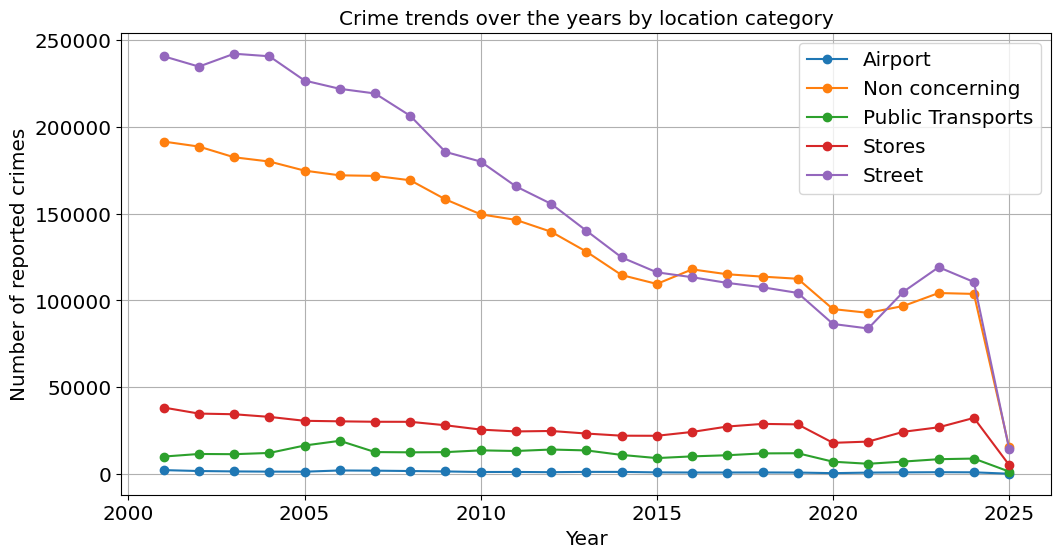

In [6]:
# Load the dataset
dataset["Year"] = dataset["Date"].dt.year

# Group by year and category, then count occurrences
crime_trends = dataset.groupby(["Year", "Location Category"]).size().unstack()
plt.figure(figsize=(12, 6))
crime_trends.plot(marker='o', figsize=(12, 6))

plt.xlabel("Year", fontsize='x-large')
plt.ylabel("Number of reported crimes", fontsize='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.title("Crime trends over the years by location category", fontsize='x-large')
plt.legend(fontsize = 'x-large')
plt.grid(True)

# save plot
plt.savefig("../plots/crime_trends_over_years_by_location_category.png")

plt.show()


In [7]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
import matplotlib.dates as mdates

# Extract hour from date
dataset['hour'] = dataset['Date'].dt.hour

# Create the interactive function
def prepare_data_for_stacked_time_plot(dataset: pd.DataFrame, save=False):
    # Filter data by selected crime type

    crime_by_hour = dataset.groupby(["hour", "Category"]).size().unstack()
    crime_by_hour = crime_by_hour.reset_index().to_dict()
    crime_by_hour = {key: [entry[index] for index in entry] for key, entry in crime_by_hour.items()}


    crime_by_hour_subcat = dataset.groupby(["Category", "Subcategory", "hour"]).size().reset_index().rename(columns={0: "count"})
    crime_by_hour_subcat = crime_by_hour_subcat.pivot(index=['Category', 'Subcategory'], columns='hour', values='count')
    crime_by_hour_subcat["hourly_counts"] = crime_by_hour_subcat.apply(lambda row: [int(row[h]) if not np.isnan(row[h]) else 0 for h in range(24)], axis=1)
    crime_by_hour_subcat = crime_by_hour_subcat.drop(columns=list(range(24)))

    subcat_dict = {}
    for category in crime_by_hour_subcat.index.levels[0]:
        # This will give you all the rows associated with this category:
        category_data = crime_by_hour_subcat.loc[category]["hourly_counts"]
        subcat_dict[category] = category_data.to_dict()

    full_dict = {"main": crime_by_hour, "subcategories": subcat_dict}


    if save:
        with open("../frontend/src/data/crime_category_over_hours.json", "w") as file:
            json.dump(full_dict, file, indent=4)

    return full_dict


In [8]:
prepare_data_for_stacked_time_plot(dataset, save=True)

{'main': {'hour': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23],
  'ASSAULT': [121511,
   107149,
   93827,
   75090,
   54896,
   39934,
   36266,
   46122,
   69852,
   82580,
   93183,
   104851,
   114204,
   112163,
   126197,
   138850,
   129602,
   128145,
   133648,
   137890,
   140872,
   142015,
   138833,
   129931],
  'MINOR': [52406,
   30791,
   24187,
   19930,
   16265,
   15169,
   22696,
   33194,
   44327,
   46774,
   59613,
   74860,
   79487,
   72811,
   69696,
   64142,
   57517,
   55233,
   67417,
   88837,
   91821,
   88809,
   82923,
   63777],
  'NON STREET CRIME': [86647,
   24245,
   19809,
   15616,
   12010,
   11028,
   14686,
   24924,
   47254,
   81044,
   64919,
   57592,
   94479,
   58331,
   59869,
   63084,
   59431,
   58785,
   58063,
   57220,
   53635,
   47854,
   41765,
   34495],
  'SEX OFFENSE': [8110,
   3197,
   3140,
   29

In [ ]:
# Create the interactive function
def prepare_data_for_stacked_time_plot_subcategory(dataset: pd.DataFrame, save=False):
    # Filter data by selected crime type

    crime_by_hour = dataset.groupby(["hour", "Category"]).size().unstack()
    crime_by_hour = crime_by_hour.reset_index().to_dict()
    crime_by_hour_json = {key: [entry[index] for index in entry] for key, entry in crime_by_hour.items()}

    if save:
        with open("../frontend/src/data/crime_category_over_hours.json", "w") as file:
            json.dump(crime_by_hour_json, file, indent=4)

    return crime_by_hour_json


In [21]:
prepare_data_for_stacked_time_plot(dataset, save=True)

{'hour': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'ASSAULT': [121511,
  107149,
  93827,
  75090,
  54896,
  39934,
  36266,
  46122,
  69852,
  82580,
  93183,
  104851,
  114204,
  112163,
  126197,
  138850,
  129602,
  128145,
  133648,
  137890,
  140872,
  142015,
  138833,
  129931],
 'MINOR': [52406,
  30791,
  24187,
  19930,
  16265,
  15169,
  22696,
  33194,
  44327,
  46774,
  59613,
  74860,
  79487,
  72811,
  69696,
  64142,
  57517,
  55233,
  67417,
  88837,
  91821,
  88809,
  82923,
  63777],
 'NON STREET CRIME': [86647,
  24245,
  19809,
  15616,
  12010,
  11028,
  14686,
  24924,
  47254,
  81044,
  64919,
  57592,
  94479,
  58331,
  59869,
  63084,
  59431,
  58785,
  58063,
  57220,
  53635,
  47854,
  41765,
  34495],
 'SEX OFFENSE': [8110,
  3197,
  3140,
  2966,
  2369,
  1809,
  1698,
  2354,
  3214,
  3000,
  2688,
  2545,
  3613,
  2834,
  3356,
  4092,
  3756,


In [14]:
plot_crime_time_distribution(dataset)

{'Category': ['ASSAULT', 'MINOR', 'NON STREET CRIME', 'SEX OFFENSE', 'THEFT'],
 0: [121511, 52406, 86647, 8110, 191627],
 1: [107149, 30791, 24245, 3197, 94263],
 2: [93827, 24187, 19809, 3140, 79004],
 3: [75090, 19930, 15616, 2966, 65473],
 4: [54896, 16265, 12010, 2369, 51462],
 5: [39934, 15169, 11028, 1809, 46983],
 6: [36266, 22696, 14686, 1698, 57135],
 7: [46122, 33194, 24924, 2354, 81618],
 8: [69852, 44327, 47254, 3214, 111099],
 9: [82580, 46774, 81044, 3000, 134825],
 10: [93183, 59613, 64919, 2688, 124215],
 11: [104851, 74860, 57592, 2545, 120794],
 12: [114204, 79487, 94479, 3613, 172451],
 13: [112163, 72811, 58331, 2834, 139235],
 14: [126197, 69696, 59869, 3356, 150315],
 15: [138850, 64142, 63084, 4092, 164426],
 16: [129602, 57517, 59431, 3756, 163011],
 17: [128145, 55233, 58785, 3603, 174297],
 18: [133648, 67417, 58063, 3601, 181279],
 19: [137890, 88837, 57220, 3423, 167785],
 20: [140872, 91821, 53635, 3479, 163280],
 21: [142015, 88809, 47854, 3428, 157132],
 

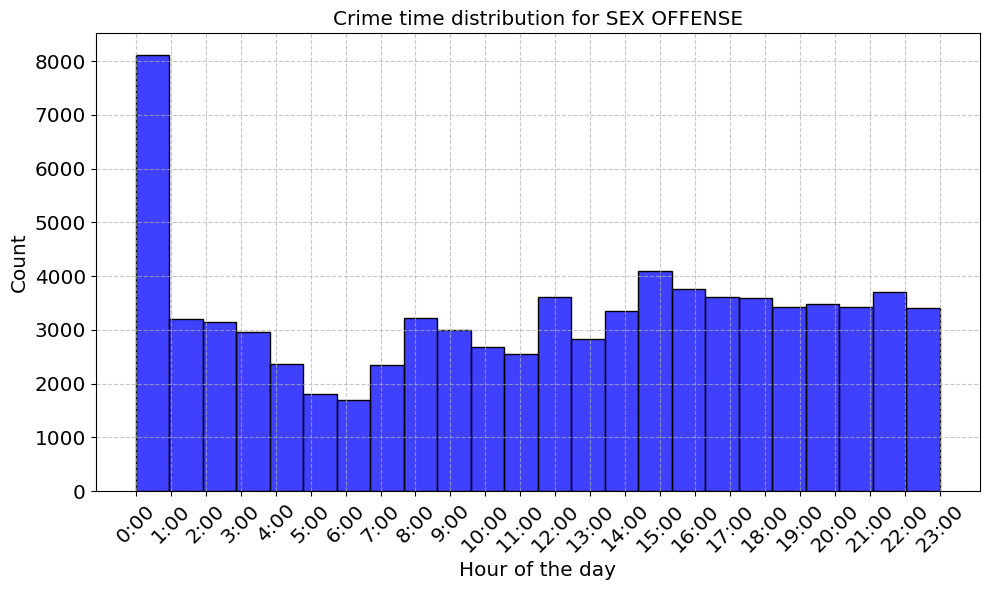

In [12]:
from typing import Tuple

plot_crime_time_distribution("SEX OFFENSE")

def get_slice(category: str, location: str, hour_range: Tuple[int, int]):
    return dataset[(dataset['Category'] == category) 
                   & (dataset["Location Category"] == location)
                   & (hour_range[0] <= dataset["hour"])
                   & (hour_range[1] > dataset["hour"])]

In [ ]:
!pip install folium
import folium
from folium.plugins import HeatMap

In [67]:
import folium
from folium.plugins import HeatMap

# Create a folium map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# Function to get the crime data slice (assuming you have this function)
crimes_selected = get_slice("SEX OFFENSE", "Street", (0, 3))
crimes_selected = pd.concat([crimes_selected, get_slice("ASSAULT", "Street", (0, 3))])


# Prepare the data for HeatMap
heat_data = [[row['Latitude'], row['Longitude']] for _, row in crimes_selected.iterrows() if row["Latitude"] is not None]

# Add the HeatMap layer
heatmap = HeatMap(
    heat_data,
    min_opacity=0.2,  
    radius=60,        
    blur=15, 
    max_zoom=40,      
).add_to(chicago_map)

# Add pinpoint markers for Loyola University Chicago and The Shops at North Bridge
locations = [
    {"name": "Loyola University Chicago", "lat": 42.0010, "lon": -87.6606, "color": "blue"},
    {"name": "The Shops at North Bridge", "lat": 41.8917, "lon": -87.6240, "color": "red"}
]

# Add markers to the map
for loc in locations:
    folium.Marker(
        location=[loc["lat"], loc["lon"]],
        popup=loc["name"],  # Clickable label
        icon=folium.Icon(color=loc["color"], icon="info-sign")  # Customize icon
    ).add_to(chicago_map)

# Save the map as an HTML file
chicago_map.save("../plots/crime_selected_density_map.html")
